Generates extended data fig. 5 (omics input distribution)

And Figure 4 (Evaluation of GPT-4 in naming ‘omics gene clusters)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams.update({'font.size': 7, 'font.family': 'sans-serif'})
plt.rcParams['xtick.labelsize'] = 7
plt.rcParams['ytick.labelsize'] = 7
plt.rcParams['axes.labelsize'] = 7
plt.rcParams['axes.titlesize'] = 7

In [4]:
Omics_analysis_DF = pd.read_csv("data/omics_revamped.txt", sep="\t")
Omics_analysis_DF.head()

,Source,GeneSetID,GeneSetName,GeneList,n_Genes
0,NeST,Cluster1-10,Cluster1-10,CTRL HSD17B14 KIAA0232 PAQR8 PLA2G1B RNF145 SG...,12
1,NeST,Cluster1-11,Cluster1-11,LMF1 MFHAS1 MR1 PLA2G1B RASL11A RNF145 SLC2A6 ...,12
2,NeST,Cluster1-12,Cluster1-12,AMY2B CNPY2 EGFL7 LDLR LPL LRP8 LRPAP1 MYLIP P...,12
3,NeST,Cluster1-13,Cluster1-13,ACO1 CDKAL1 CDX2 CIAO1 CITED2 FAM96A FAM96B FB...,16
4,NeST,Cluster1-14,Cluster1-14,DTWD1 DTWD2 POLD2 POLD4 POLH POLI RAD18 REV1 R...,15


### Plot distribution of number of genes

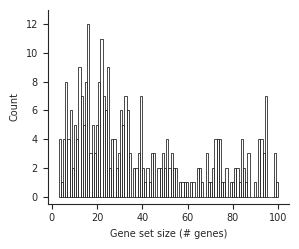

In [19]:
plt.figure(figsize=(3,2.5))
sns.set_style("ticks")
plt.hist(Omics_analysis_DF["n_Genes"], bins=100, edgecolor='black', color='white', linewidth=0.5)

plt.xlabel("Gene set size (# genes)")
plt.ylabel("Count" )

plt.ylim(-0.5, 13)
# Remove the grid
plt.grid(False)

sns.despine()
plt.tight_layout()

plt.savefig("figures/omics_analysis_gene_set_size_histogram.svg", format="svg", bbox_inches = 'tight')
plt.show()

## Figure 4a 

The number of omics gene clusters named by GPT-4 or by GO enrichment analysis using g:Profiler versus the gene cluster overlap threshold measured by Jaccard Index

coverage threshold: 0.0, enrichment: 229.0, LLM: 135.0
coverage threshold: 0.05, enrichment: 84.0, LLM: 62.0
coverage threshold: 0.1, enrichment: 33.0, LLM: 42.0
coverage threshold: 0.2, enrichment: 4.0, LLM: 21.0


/cellar/users/mhu/Projects/llm_evaluation_for_gene_set_interpretation/utils/analyze_enrichment_utils.py:190: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(-8, 300)


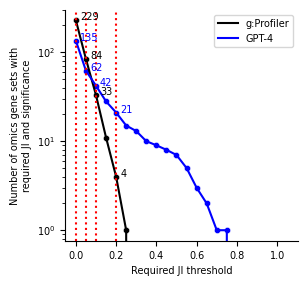

In [2]:
import pandas as pd
import numpy as np

# load the data
reduced_LLM_genes_APV_only_DF = pd.read_csv("data/omics_revamped_LLM_gprofiler_new_gene_name_DF_APV_only.tsv", sep="\t")

from utils.analyze_enrichment_utils import plot_thresholding_res
%reload_ext autoreload
%autoreload 2

# set adj p-value threshold and LLM confidence score threshold
adj_pval_thresh = 0.05
LLM_score_thresh = 0.01

save_plot_dir = 'figures/omics_revamped_LLM_gprofiler_new_gene_name_DF_reduce_APV_add_JI_thresh_curve.svg'
plot_thresholding_res(reduced_LLM_genes_APV_only_DF, 'gprofiler_JI', 'LLM_JI',coverage_thresh_list = np.arange(0.0, 1.1, 0.05), enrich_adj_pval_thresh = adj_pval_thresh, LLM_score_thresh = LLM_score_thresh, highlight_coverage = [0.0, 0.05, 0.1, 0.2],figsize=(3,3), ax_label_keyword= 'JI', log_scale=True, save_file=save_plot_dir)

# Figure 4b 
Specificity of cluster naming by g:Profiler functional enrichment against the specificity of naming by GPT-4

high similarity: 120 
in percentage: 96.77%
low similarity: 4 
in percentage: 3.23%
high similarity high number genes: 81 
in percentage: 65.32%


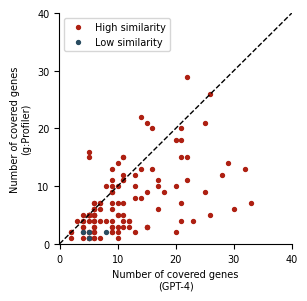

In [5]:
df = pd.read_csv("data/omics_revamped_LLM_gprofiler_new_gene_name_DF_trimed_name_simVals_max_named.tsv", sep="\t")


similarity_thre = 0.5

# y_field = 'gprofiler_JI'
# y_label = 'g:Profiler coverage'
# x_field = 'LLM_JI'
# x_label = 'GPT-4 coverage'

y_field = 'intersection_size'
y_label = 'Number of covered genes\n(g:Profiler)'
x_field = 'Supporting Count'
x_label = 'Number of covered genes\n(GPT-4)'


# Filter the DataFrame
filtered_data_high = df[df['LLM_name_GO_term_sim'] >= similarity_thre]
filtered_data_low = df[df['LLM_name_GO_term_sim'] < similarity_thre]
print(f'high similarity: {filtered_data_high.shape[0]}', f'\nin percentage: {filtered_data_high.shape[0]/df.shape[0] *100 :.2f}%')
print(f'low similarity: {filtered_data_low.shape[0]}', f'\nin percentage: {filtered_data_low.shape[0]/df.shape[0] *100 :.2f}%')

# further breakdown the high similarity group into high and low JI
filtered_data_high_JI_high = filtered_data_high[filtered_data_high[x_field]>filtered_data_high[y_field]]
print(f'high similarity high number genes: {filtered_data_high_JI_high.shape[0]}', f'\nin percentage: {filtered_data_high_JI_high.shape[0]/df.shape[0] *100 :.2f}%')
filtered_data_high_JI_low = filtered_data_high[filtered_data_high[x_field]<=filtered_data_high[y_field]]
# LLM JI vs gprofiler JI, colored by the similarity with countinuous color
plt.figure(figsize=(3,3))

# Create the scatter plot using the filtered data with explicit normalization
# Here, we switch to using matplotlib directly

plt.scatter(
    x=filtered_data_high[x_field], 
    y=filtered_data_high[y_field], 
    c='#ae2012',
    s=8,  # Set the size of the points
    label='High similarity'
)

# plot the low similarity data
plt.scatter(
    x=filtered_data_low[x_field], 
    y=filtered_data_low[y_field], 
    c='#294c60',
    s=8,  # Set the size of the points
    label='Low similarity'
)

plt.xlabel(x_label)
plt.ylabel(y_label)
# plt.axvline(x=JI_thresh, color='black', linestyle='--', label='JI threshold')
# plt.axhline(y=JI_thresh, color='black', linestyle='--')
plt.xlim(-0.05, 40)
plt.ylim(-0.05, 40)
# Ensure the x and y ticks are the same
ticks = range(0, 41, 10)
plt.xticks(ticks)
plt.yticks(ticks)
# plot diagonal line
plt.plot([0, 40], [0, 40], lw=1, color = 'black', linestyle='--')


sns.despine()
plt.legend()
plt.savefig('figures/omics_LLM_genes_vs_gprofiler_genes_sep_similarity.svg', dpi=300)
plt.show()

# Figure 4c 

heatmap of supporting genes for the names (gprofiler and llm) 

example L1000  Cluster2-105

In [6]:
## input file: LLM analyzed + gProfiler enrichment
updated_name_llm_file = 'data/omics_revamped_LLM_gprofiler_new_gene_name_DF.tsv'

# Read the TSV file into a Pandas DataFrame
LLM_genes_DF = pd.read_csv(updated_name_llm_file, delimiter="\t")

## load the LLM coverage data as a common df to merge
llm_coverage_df = pd.read_csv("data/omics_revamped_LLM_genecounts_DF.tsv", sep="\t")

llm_JI_file = 'data/omics_revamped_LLM_w_best_matching_GO_terms_for_JI.tsv'
llm_ji_df = pd.read_csv(llm_JI_file, sep="\t")

# merge with the LLM coverage data
merged_genes_DF = pd.merge(LLM_genes_DF, llm_coverage_df, on=['Source','GeneSetID','GeneSetName', 'GeneList', 'n_Genes'], how='left')
print(merged_genes_DF.shape)
# print(merged_genes_DF.columns)

# merge with the LLM JI data
merged_genes_DF = pd.merge(merged_genes_DF, llm_ji_df, on=['Source','GeneSetID','GeneList','n_Genes', 'LLM Name','Supporting Count'], how='left')
print(merged_genes_DF.shape)

(53452, 21)
(53452, 26)


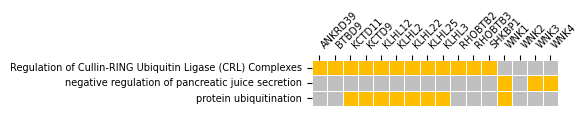

In [7]:
# find the GeneSetID: Cluster2-105 from the full table
example = merged_genes_DF.loc[
merged_genes_DF['GeneSetID'] == 'Cluster2-105'].iloc[[0,2]] # one is the most significant, one is more similar name
# example
geneList = example['GeneList'].values[0].split(' ')

new_cols = ['Name', 'Supporting Genes','Named by']
new_df = pd.DataFrame(columns=new_cols)

# LLM supporting genes
llm_supporting_genes = example['Supporting Genes'].values[0].split(' ')
# Join the LLM supporting genes list into a single string
llm_supporting_genes_str = ', '.join(llm_supporting_genes)
llm_name_row = pd.DataFrame({'Name': [example['LLM Name'].values[0]], 'Supporting Genes': llm_supporting_genes_str, 'Named by': ['GPT-4']})
new_df = pd.concat([new_df, llm_name_row], ignore_index=True)

for go_term in example['Term'].values:
    intersection = example.loc[example['Term'] == go_term, 'intersections'].values[0].split(',')
    # Join the intersection list into a single string
    intersection_str = ', '.join(intersection)
    new_row = pd.DataFrame({'Name': [go_term], 'Supporting Genes': intersection_str, 'Named by': ['g:Profiler']})
    new_df = pd.concat([new_df, new_row], ignore_index=True)


new_df = new_df.reset_index(drop=True)
# new_df
# geneList
# plot a heatmap, where columns are the genes and rows are the gene sets, heat at the intersections

# column is all the genes in the target gene set 
genes = set(geneList)
genes = sorted(genes)

# Create a binary matrix
matrix = pd.DataFrame(0, index=new_df['Name'], columns=genes)
for idx, row in new_df.iterrows():
    supporting_genes = row['Supporting Genes'].split(', ')
    matrix.loc[row['Name'], supporting_genes] = 1

# Calculate appropriate figure size based on the number of genes and gene sets
fig_height =len(new_df['Name']) * 0.2
fig_width= len(genes) * 0.2

# Plot the heatmap with square cells and adjusted figure size
plt.figure(figsize=(fig_width, fig_height))
ax = sns.heatmap(matrix, cmap=['#c0c0c0', '#ffbd00'], cbar=False, linewidths=.5, annot=False, square=True)
# Move the x-axis labels to the top
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

# Adjust the font size of the labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='left')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right')


plt.xlabel('')
plt.ylabel('')
plt.savefig('figures/omics_LLM_gprofiler_CULLIN_example_gene_intersection_heatmap.svg', dpi=300)
plt.show()